# Exploratory Data Analysis (EDA)

## Objective
Perform exploratory analysis on the raw dataset to:
- Understand data structure
- Identify missing values, duplicates, outliers
- Analyze feature distributions and target variable
- Decide data cleaning strategy for the data pipeline

# No data cleaning is performed in this notebook.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

raw_Data_Path = "../data/raw/raw_Data.csv"

data = pd.read_csv(raw_Data_Path)
data.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,City,Product_Category,Unit_Price,Quantity,Payment_Method,Customer_Rating,Total_Sales
0,1000,2024-10-02,C-6448,M,40,Berlin,Mouse,61.24,1,Credit Card,5.0,61.24
1,1001,11/05/2023,C-2076,Male,33,Berlin,Keyboard,40.28,1,Credit Card,3.0,40.28
2,1002,2024-12-23,C-9117,M,53,Paris,Smartwatch,106.18,5,paypal,5.0,530.90
3,1003,2024-03-20,C-4240,F,44,Paris,Smartwatch,349.73,1,PayPal,5.0,349.73
4,1004,2023-03-10,C-8071,Male,29,Tokyo,Headphones,112.15,1,Debit Card,1.0,112.15


<Figure size 1000x500 with 0 Axes>

In [2]:
print("Shape: ", data.shape)
data.info()

Shape:  (1180, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1180 non-null   int64  
 1   Date              1180 non-null   object 
 2   Customer_ID       1180 non-null   object 
 3   Gender            1121 non-null   object 
 4   Age               1180 non-null   int64  
 5   City              1125 non-null   object 
 6   Product_Category  1180 non-null   object 
 7   Unit_Price        1180 non-null   float64
 8   Quantity          1180 non-null   int64  
 9   Payment_Method    1124 non-null   object 
 10  Customer_Rating   1063 non-null   float64
 11  Total_Sales       1180 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 110.8+ KB


In [3]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction_ID,1180.0,NaN,NaN,NaN,1574.489831,331.956951,1000.0,1287.75,1573.5,1860.25,2149.0
Date,1180,656,Not Available,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,1180,1084,C-2319,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1121,6,Female,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1180.0,NaN,NaN,NaN,35.605085,14.035396,-5.0,27.0,35.0,43.0,150.0
City,1125,9,Paris,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,1180,9,Laptop,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit_Price,1180.0,NaN,NaN,NaN,637.139483,2558.476087,-100.0,107.2325,283.925,719.9775,50000.0
Quantity,1180.0,NaN,NaN,NaN,14.383898,251.816153,1.0,1.0,1.0,2.0,5000.0
Payment_Method,1124,6,Credit Card,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Analysis

In [4]:
missing_counts = data.isnull().sum()
missing_percent = (missing_counts / len(data)) * 100

missing_data = pd.DataFrame({
    "Missing_Count": missing_counts,
    "Missing_Percent": missing_percent
}).sort_values(by="Missing_Percent", ascending=False)

missing_data


,Missing_Count,Missing_Percent
Customer_Rating,117,9.915254
Gender,59,5.000000
Payment_Method,56,4.745763
City,55,4.661017
Customer_ID,0,0.000000
Date,0,0.000000
Transaction_ID,0,0.000000
Age,0,0.000000
Unit_Price,0,0.000000
Product_Category,0,0.000000


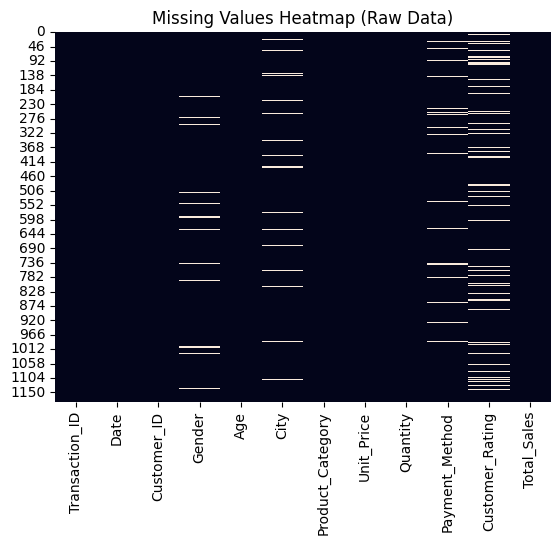

In [5]:
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap (Raw Data)")
plt.show()


### Missing Values Observations

- Missing values are present mainly in categorical columns: Gender, City, Payment_Method.
- Customer_Rating has the highest missing count among numerical features.
- Missingness is column-specific and appears random, with no row-wise dependency.
- No column exceeds a critical missingness threshold (>30%).

### Initial Cleaning Decisions
- Categorical columns → impute using mode.
- Customer_Rating → impute using median.
- No rows will be dropped solely due to missing values.


## Duplicate Records Analysis

In [6]:
exact_duplicates = data.duplicated().sum()
exact_duplicates


np.int64(30)

In [7]:
data[data.duplicated()].head()


,Transaction_ID,Date,Customer_ID,Gender,Age,City,Product_Category,Unit_Price,Quantity,Payment_Method,Customer_Rating,Total_Sales
1150,1838,2023-11-29,C-6908,M,40,Berlin,Smartphone,826.98,1,Debit Card,3.0,826.98
1151,1118,2024-02-04,C-1324,NB,32,Berlin,Mouse,62.56,2,PayPal,5.0,125.12
1152,2006,2023-12-30,C-4569,Female,49,Toronto,Headphones,147.04,10,Credit Card,3.0,1470.40
1153,1778,26/01/2023,C-2294,NB,12,Sydney,Tablet,253.80,1,Credit Card,5.0,253.80
1154,1136,2023-10-16,C-8193,F,34,Tokyo,Laptop,819.30,1,NaN,4.0,819.30


In [8]:
data["Transaction_ID"].duplicated().sum()


np.int64(30)

In [9]:
data[data["Transaction_ID"].duplicated(keep=False)].sort_values("Transaction_ID").head()


,Transaction_ID,Date,Customer_ID,Gender,Age,City,Product_Category,Unit_Price,Quantity,Payment_Method,Customer_Rating,Total_Sales
16,1016,2023-05-11,C-1649,Female,17,London,Smartphone,1311.61,1,Bank Transfer,4.0,1311.61
1170,1016,2023-05-11,C-1649,Female,17,London,Smartphone,1311.61,1,Bank Transfer,4.0,1311.61
1179,1018,2023-04-16,C-1973,Non-Binary,38,Paris,Smartwatch,122.37,10,Cash,5.0,1223.70
18,1018,2023-04-16,C-1973,Non-Binary,38,Paris,Smartwatch,122.37,10,Cash,5.0,1223.70
88,1088,2024-04-03,C-3713,M,35,Berlin,Smartphone,1246.99,1,Credit Card,5.0,1246.99


In [10]:
data["Customer_ID"].duplicated().sum()


np.int64(96)

### Duplicate Analysis Observations

- 30 exact duplicate rows were identified in the dataset.
- Several Transaction_ID values appear more than once.
- Sample inspection confirmed that many Transaction_ID duplicates are exact row-level duplicates.
- Customer_ID duplicates are expected due to multiple purchases by the same customer, total 96 in number

### Final Cleaning Decisions

- All exact duplicate rows will be removed.
- For remaining Transaction_ID duplicates, the first occurrence will be retained.
- Customer_ID duplicates will not be removed.


## Outlier Analysis

In [11]:
numerical_cols = [
    "Age",
    "Unit_Price",
    "Quantity",
    "Customer_Rating",
    "Total_Sales"
]

data[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1180.0,35.605085,14.035396,-5.0,27.0000,35.000,43.0000,150.0
Unit_Price,1180.0,637.139483,2558.476087,-100.0,107.2325,283.925,719.9775,50000.0
Quantity,1180.0,14.383898,251.816153,1.0,1.0000,1.000,2.0000,5000.0
Customer_Rating,1063.0,3.594544,1.301255,1.0,3.0000,4.000,5.0000,5.0
Total_Sales,1180.0,3847.444250,60519.927030,-100.0,139.5300,376.180,1062.4500,1593450.0


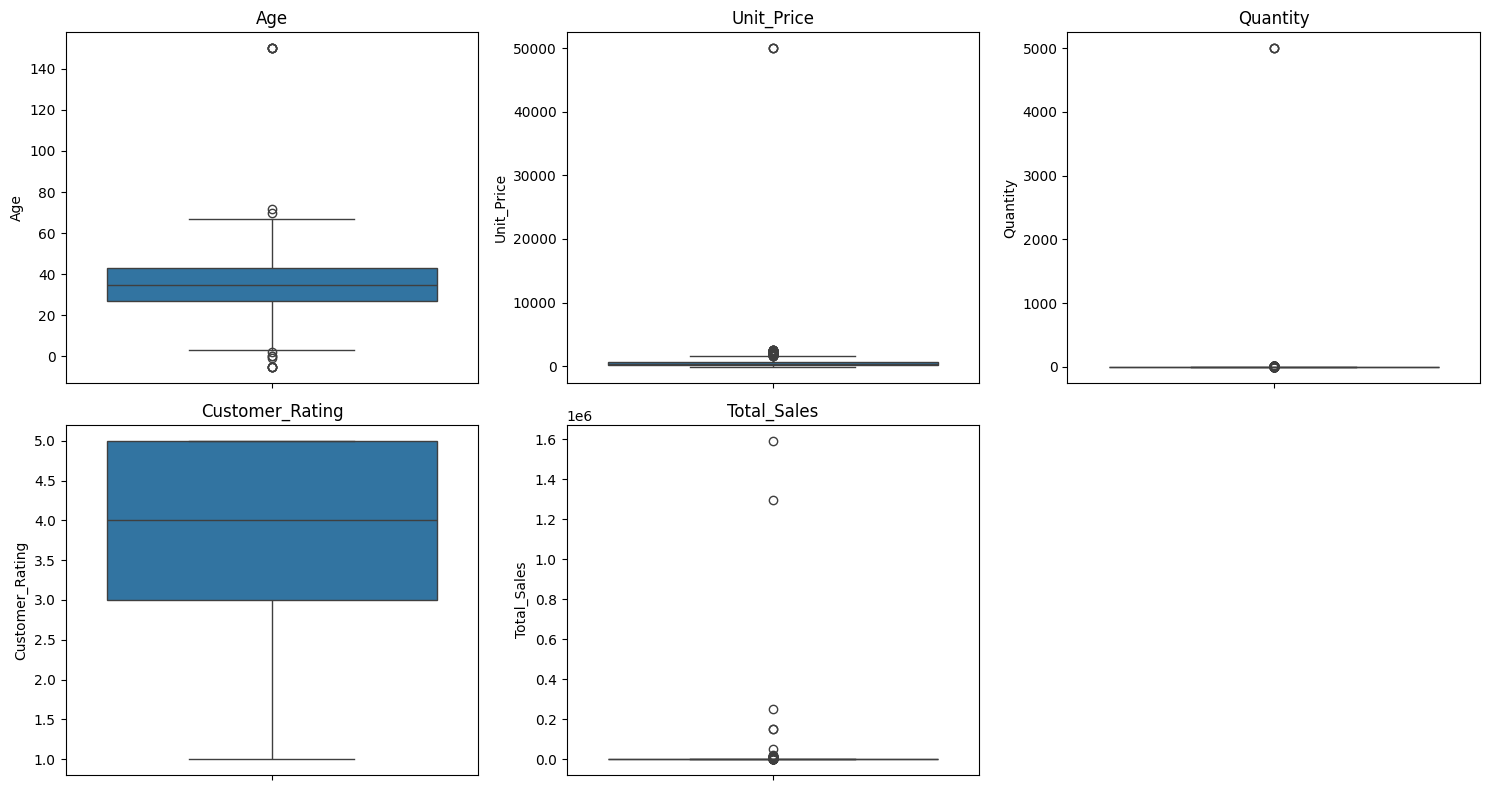

In [12]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Boxplot Interpretation Summary

- Age shows invalid values (negative and unrealistically high), indicating data entry errors.
- Unit_Price contains negative values and extreme high values, requiring removal and IQR capping.
- Quantity is heavily right-skewed with extreme values, best handled via IQR capping.
- Customer_Rating is bounded and clean with no outliers.
- Total_Sales outliers are driven by Unit_Price and Quantity anomalies and will be handled indirectly.


## Data Inconsistencies & Standardization

In [13]:
data["Gender"].value_counts(dropna=False)


Gender
Female        205
F             199
Non-Binary    186
Male          182
NB            177
M             172
NaN            59
Name: count, dtype: int64

In [14]:
data["Payment_Method"].value_counts(dropna=False)


Payment_Method
Credit Card      228
Debit Card       227
Bank Transfer    223
Cash             210
PayPal           202
NaN               56
paypal            34
Name: count, dtype: int64

In [15]:
data["City"].value_counts(dropna=False)


City
Paris        145
London       145
Berlin       140
Toronto      139
Singapore    137
Tokyo        136
Sydney       135
New York     125
NaN           55
New York      23
Name: count, dtype: int64

In [16]:
data["Date"].head(20)


0        2024-10-02
1        11/05/2023
2        2024-12-23
3        2024-03-20
4        2023-03-10
5     Not Available
6        2023-01-21
7        2024-06-18
8        2023-03-17
9        15/03/2024
10       2024-03-14
11       2023-01-12
12       2024-02-25
13       2024-10-11
14       2023-11-28
15       2023-09-05
16       2023-05-11
17       2023-10-27
18       2023-04-16
19       2024-11-07
Name: Date, dtype: object

In [17]:
data["Date"].value_counts().head(10)


Date
Not Available    42
2023-02-26        6
2023-11-29        6
2024-05-25        6
2024-07-08        5
2023-07-07        5
2023-08-27        5
2024-10-31        5
2024-02-19        5
2023-04-16        5
Name: count, dtype: int64

### Standardization Decisions

- Gender values will be standardized to: Male, Female, Non-Binary, Unknown.
- Payment_Method values will be normalized for casing and naming consistency.
- Missing categorical values (Gender, City, Payment_Method) will be imputed using mode.
- Date column will be converted to datetime format; invalid entries will be set to NaT.
- No categorical columns will be dropped at this stage.

## Correlation Analysis (Raw Data)

In [18]:
numerical_cols = [
    "Age",
    "Unit_Price",
    "Quantity",
    "Customer_Rating",
    "Total_Sales"
]

corr_matrix = data[numerical_cols].corr()

corr_matrix


,Age,Unit_Price,Quantity,Customer_Rating,Total_Sales
Age,1.000000,0.006901,0.051841,-0.058812,0.036155
Unit_Price,0.006901,1.000000,-0.008279,0.030258,0.118894
Quantity,0.051841,-0.008279,1.000000,-0.010588,0.842617
Customer_Rating,-0.058812,0.030258,-0.010588,1.000000,0.016489
Total_Sales,0.036155,0.118894,0.842617,0.016489,1.000000


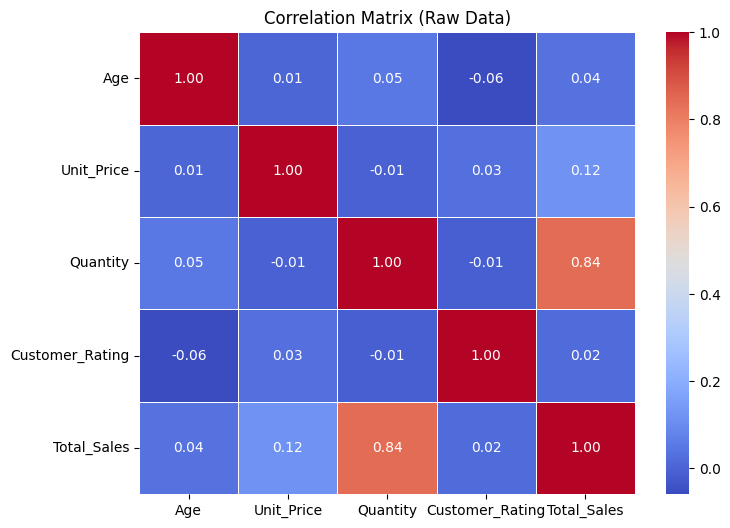

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix (Raw Data)")
plt.show()


## Numerical Feature Distributions

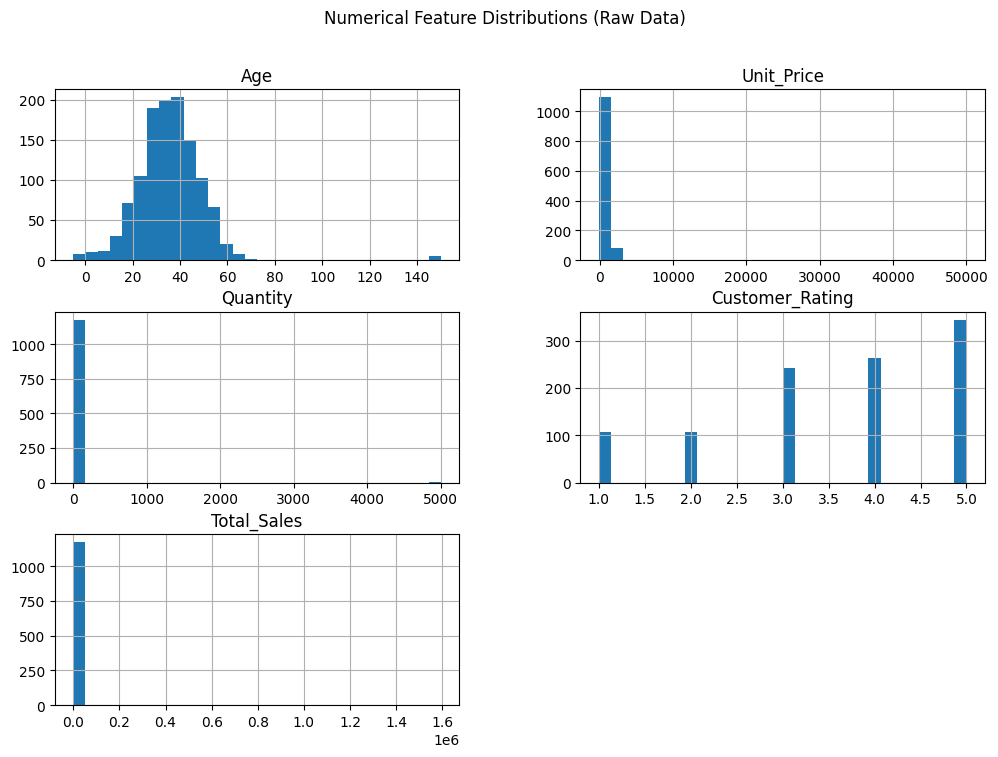

In [20]:
numerical_cols = [
    "Age",
    "Unit_Price",
    "Quantity",
    "Customer_Rating",
    "Total_Sales"
]

data[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions (Raw Data)")
plt.show()


## Target Variable Distribution

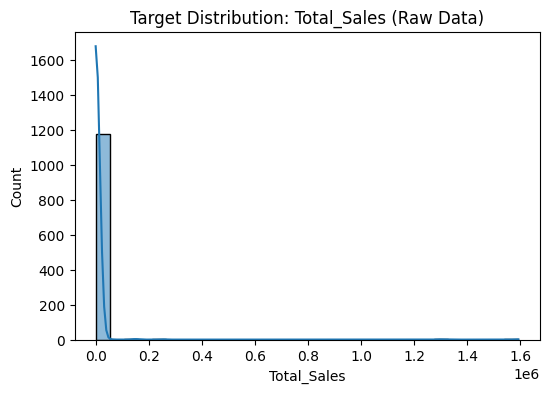

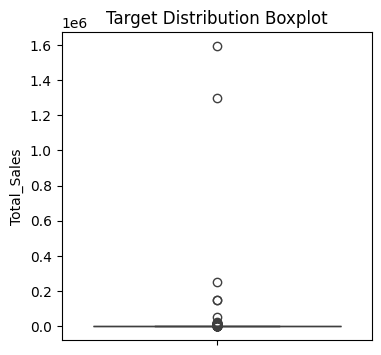

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(data["Total_Sales"], bins=30, kde=True)
plt.title("Target Distribution: Total_Sales (Raw Data)")
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(y=data["Total_Sales"])
plt.title("Target Distribution Boxplot")
plt.show()


# Post-Cleaning EDA (Validation)

In [22]:
CLEAN_DATA_PATH = "../data/processed/cleaned_Data.csv"

data_clean = pd.read_csv(CLEAN_DATA_PATH)
data_clean.shape

(975, 12)

In [23]:
data_clean.isnull().sum()

Transaction_ID      0
Date                0
Customer_ID         0
Gender              0
Age                 0
City                0
Product_Category    0
Unit_Price          0
Quantity            0
Payment_Method      0
Customer_Rating     0
Total_Sales         0
dtype: int64

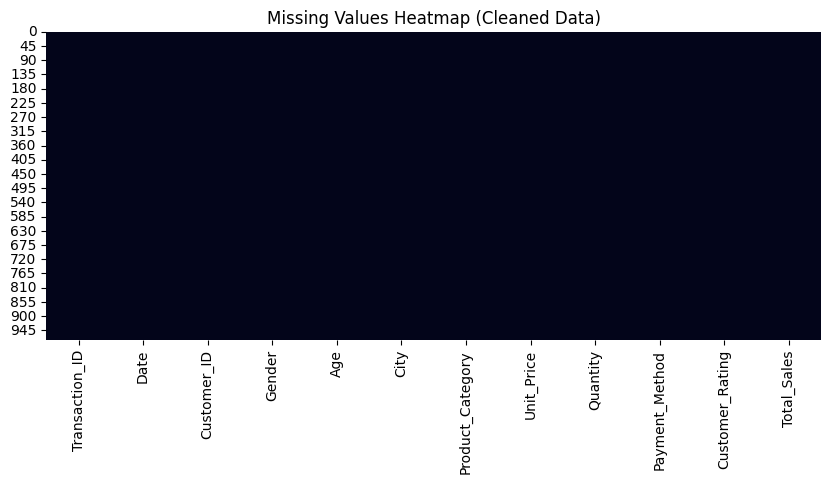

In [24]:
plt.figure(figsize=(10, 4))
sns.heatmap(data_clean.isnull(), cbar=False)
plt.title("Missing Values Heatmap (Cleaned Data)")
plt.show()


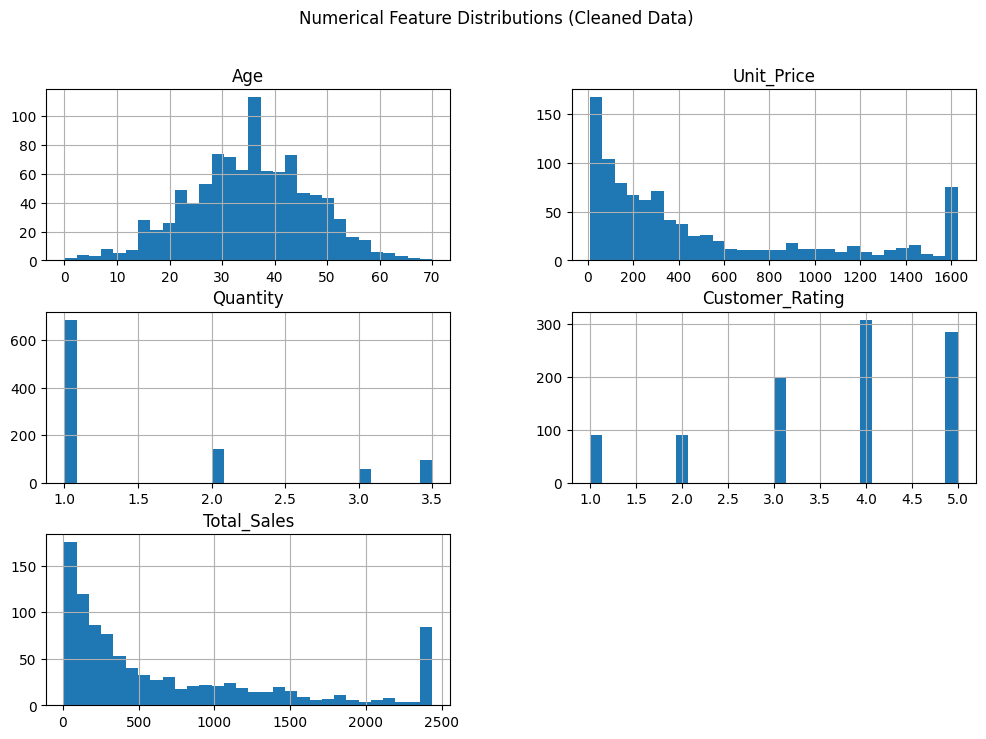

In [25]:
numerical_cols = [
    "Age",
    "Unit_Price",
    "Quantity",
    "Customer_Rating",
    "Total_Sales"
]

data_clean[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Numerical Feature Distributions (Cleaned Data)")
plt.show()


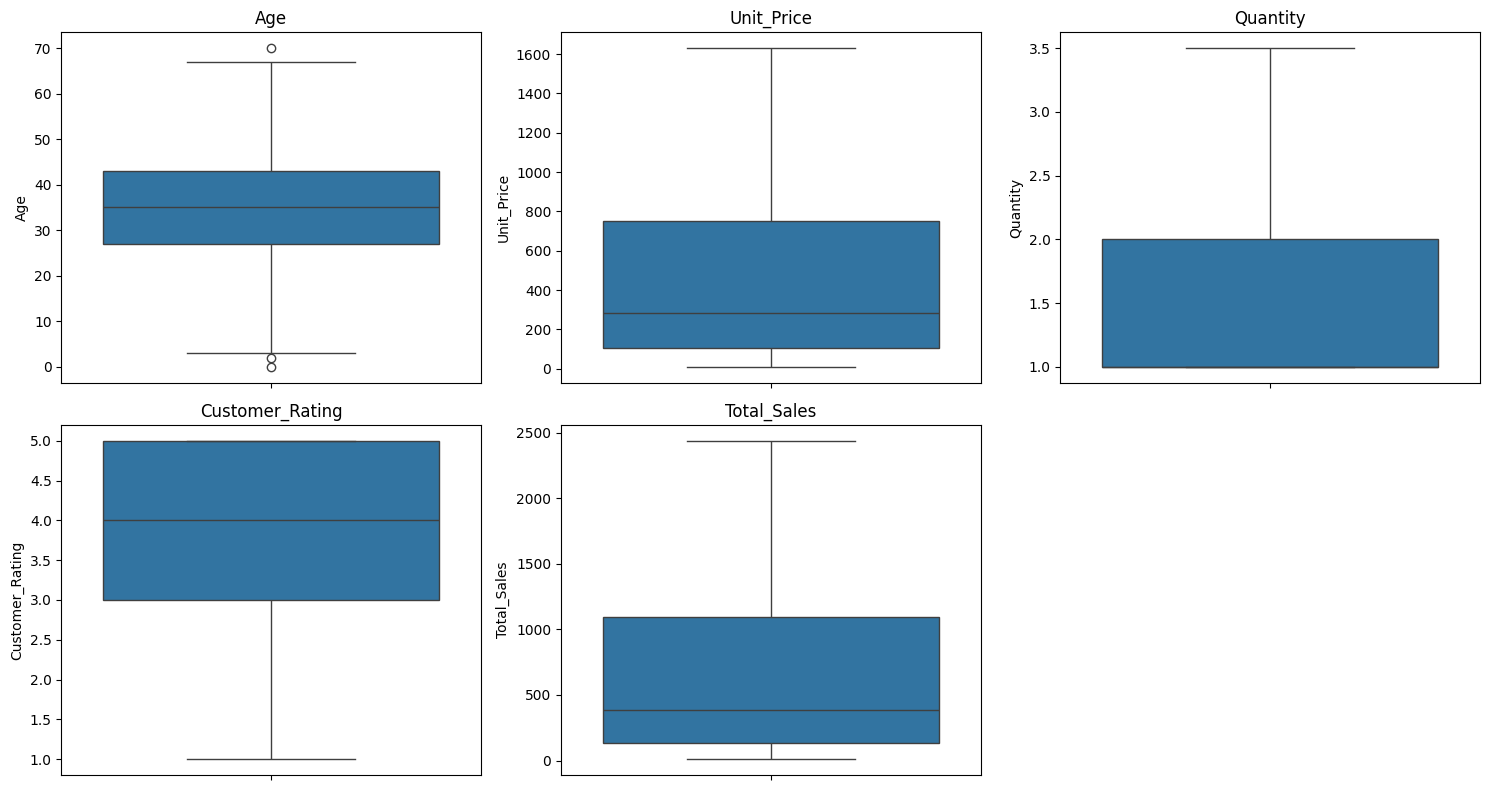

In [26]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_clean[col])
    plt.title(col)

plt.tight_layout()
plt.show()


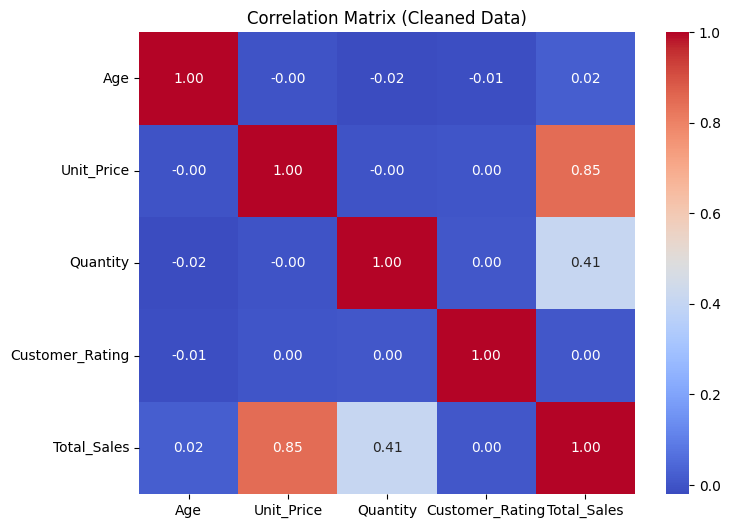

In [27]:
corr_clean = data_clean[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_clean, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Cleaned Data)")
plt.show()
